In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Deterministic example

The following cell is just generating and visualising the data we will work with.<br>
This has been done for you so that you can focus on learning the principles of linear regression.<br> Don't spend too long on it.

,sunshine_hours,crop_yield_kg_ha
0,10.057047,4199.093966
1,11.179586,8116.733823
2,10.216925,4757.064942
3,9.790812,3269.938261
4,10.707754,6470.050050


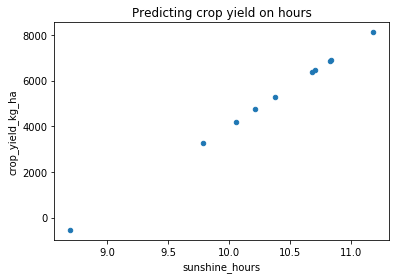

In [2]:
n = 10
X,y = make_regression(n,1,1,noise=0,bias=100)
feature1,target = 'sunshine_hours','crop_yield_kg_ha'
df = pd.DataFrame({feature1:X[:,0]+10,target:y*40})
df.plot.scatter(feature1,target)
plt.title('Predicting crop yield on hours')
df.head()

What crop yield would you estimate for 10 hours of sun?<br>
And for 12 hours?<br>
What logic did you follow?

### Calculating the line

$y = \beta_0 + \beta_1*X$<br>
<br>
Another way to look at it without using Greek letters<br>
$y = intercept + slope*X$

In [3]:
# Calculating the slope ( raise over run )
raise_ = df.loc[2,target] - df.loc[1,target]
run = df.loc[2,feature1] - df.loc[1,feature1]
beta_1 = raise_/run
beta_1

3489.9832858578225

![Intercept](images/y-intercept.png)

$beta_0 = y - beta_1*X$

In [4]:
beta_0 = df.loc[2,target] - df.loc[2,feature1]*beta_1
beta_0

-30899.83285857823

### Generating predictions based on the line

In [5]:
new_data = np.array([10,12])

In [6]:
new_preds = new_data*beta_1 + beta_0
new_preds

array([ 4000.        , 10979.96657172])

,sunshine_hours,crop_yield_kg_ha
0,10.057047,4199.093966
1,11.179586,8116.733823
2,10.216925,4757.064942
3,9.790812,3269.938261
4,10.707754,6470.050050


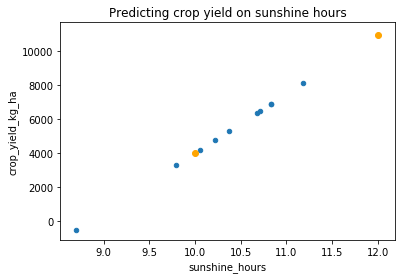

In [7]:
df.plot.scatter(feature1,target)
plt.scatter(new_data,new_preds,color='orange')
plt.title('Predicting crop yield on sunshine hours')
df.head()

### Visualising the intercept

In [8]:
new_data = np.array([10,12,0,6,-2])

In [9]:
new_preds = new_data*beta_1 + beta_0
new_preds

array([  4000.        ,  10979.96657172, -30899.83285858,  -9959.93314343,
       -37879.79943029])

,sunshine_hours,crop_yield_kg_ha
0,10.057047,4199.093966
1,11.179586,8116.733823
2,10.216925,4757.064942
3,9.790812,3269.938261
4,10.707754,6470.050050


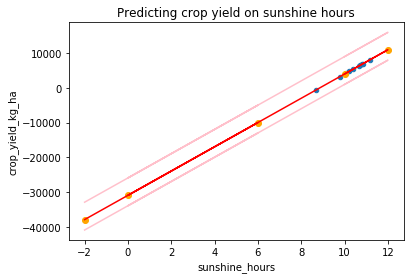

In [10]:
df.plot.scatter(feature1,target)
plt.scatter(new_data,new_preds,color='orange')
plt.plot(new_data,new_preds,color='red')
plt.plot(new_data,new_preds+5000,color='pink')
plt.plot(new_data,new_preds-3000,color='pink')
plt.title('Predicting crop yield on sunshine hours')
df.head()

### Figuring out the coefficients with statsmodels

In [11]:
import statsmodels.api as sm

# Setting up the LEARNER
Xc = sm.add_constant(df[feature1])
model_sm = sm.OLS(df[target],Xc)

# Actually LEARNING
results = model_sm.fit()

# # Understanding the LEARNED model
est_beta = results.params
print(est_beta.round(4))

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

const            -30899.8329
sunshine_hours     3489.9833
dtype: float64
R2 = 1.0


We can see that our constant or intercept matches the value we calculated earlier for beta_0<br>
The coefficient for 'sunshine_hours' also matches the value we calculated earlier for beta_1<br>
<br>
We can see our model has an $R^2 = 1$ which is the maximum and tells us the model predictions are correct 100% of the time<br>
(Don't expect this in real life)

# Noisy example

,sunshine_hours,crop_yield_kg_ha
0,8.994175,2520.356673
1,9.526249,3385.374850
2,12.448627,7965.824679
3,11.536549,7017.117184
4,10.065507,4244.595442


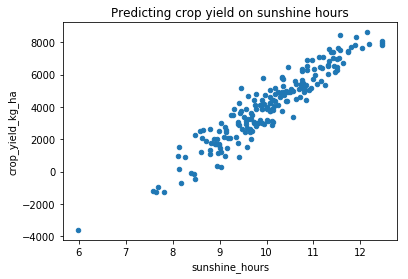

In [12]:
n = 200
X,y = make_regression(n,1,1,noise=20,bias=100)
feature1,target = 'sunshine_hours','crop_yield_kg_ha'
df2 = pd.DataFrame({feature1:X[:,0]+10,target:y*40})
df2.plot.scatter(feature1,target)
plt.title('Predicting crop yield on sunshine hours')
df2.head()

In this case, it is not possible to draw a straight line that goes through every single data point<br><br>
Instead, we try to find the **line of best fit**<br>
The line that is the least far from each point<br>
We will be using the **sum of the square errors** to guide us

### Squared Error

![Squared Error](images/sum_squares_viz.jpg)

In [13]:
import statsmodels.api as sm

# Setting up the LEARNER
Xc = sm.add_constant(df2[feature1])
model_sm = sm.OLS(df2[target],Xc)

# Actually LEARNING
results = model_sm.fit()

# # Understanding the LEARNED model
est_beta = results.params
print(est_beta.round(4))

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

const            -15820.3375
sunshine_hours     1979.4770
dtype: float64
R2 = 0.89


In [24]:
preds = results.predict(Xc)

,sunshine_hours,crop_yield_kg_ha
0,10.057047,4199.093966
1,11.179586,8116.733823
2,10.216925,4757.064942
3,9.790812,3269.938261
4,10.707754,6470.050050


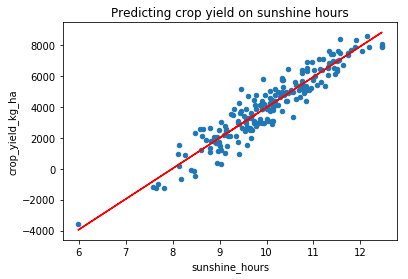

In [25]:
df2.plot.scatter(feature1,target)
plt.plot(df2[feature1],preds,color='red')
plt.title('Predicting crop yield on sunshine hours')
df.head()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       crop_yield_kg_ha   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1569.
Date:                Fri, 01 May 2020   Prob (F-statistic):           4.59e-96
Time:                        11:35:47   Log-Likelihood:                -1605.7
No. Observations:                 200   AIC:                             3215.
Df Residuals:                     198   BIC:                             3222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.582e+04    504.806    -31.339      0.000   -1.68e+04   -1.48e+04
sunshine_hours  1979.4770     49.967     39.616      0.000    1880.942    2078.012
==============================================================================
Omnibus:                        0.647   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.619
Skew:                           0.134   Prob(JB):                        0.734
Kurtosis:                       2.953   Cond. No.                         97.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""